#In this Python Notebook, I will domonstrate


*   Approach 1 to balancing data - Mannually assemble the data
*   Approach 2 to balancing data - Oversampling
*   Approach 3 to balancing data - Undersampling
*   Perform cross-validation in classification





**Import packages**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

**Reading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
business = pd.read_csv('/content/drive/MyDrive/INFOSYS365_Data/Yelp/fl_business.csv')
business.head()

<ipython-input-4-33ef99cc55b5>:1: DtypeWarning: Columns (12,45,46,47,48,49,50,51,52,83,86) have mixed types. Specify dtype option on import or set low_memory=False.
  business = pd.read_csv('/content/drive/MyDrive/INFOSYS365_Data/Yelp/fl_business.csv')


business_id                                         categories  \
0  oaepsyvc0J17qwi8cfrOWg                         Beauty & Spas, Hair Salons   
1  SFqFFIA4Ks2oHfgEANoRlw  Tapas Bars, Restaurants, American (New), Food,...   
2  2PxZ-fICnd432NJHefXrcA                          Hotels & Travel, Airports   
3  SrsebLQ5lVehQXJp8OcBUg  Asian Fusion, American (New), Restaurants, Sus...   
4  MUeUyqhMja-nnmvgP4rBBg  Hotels, Vacation Rentals, Hotels & Travel, Eve...   

          city                                            address  is_open  \
0  Orange City                                 2566 Enterprise Rd        1   
1      Orlando                              8625 International Dr        1   
2      Orlando                                  1 Jeff Fuqua Blvd        1   
3      Orlando  Universal Citywalk - Orlando, 6000 Universal Blvd        1   
4    Kissimmee                            4787 W Irlo Bronson Hwy        0   

    latitude  longitude                                 name  postal_code  \
0  28.914482 -81.295979                          Great Clips      32763.0   
1  28.440381 -81.469822                     Café Tu Tu Tango      32819.0   
2  28.427839 -81.308183  Orlando International Airport - MCO      32827.0   
3  28.473028 -81.465348         The Cowfish Sushi Burger Bar      32819.0   
4  28.330255 -81.469464               Saratoga Resort Villas      34746.0   

   review_count  ...  attributes_WheelchairAccessible attributes_WiFi  \
0             8  ...                              NaN             NaN   
1          3236  ...                             True         u'free'   
2          2630  ...                             True         u'free'   
3          2407  ...                             True            'no'   
4            55  ...                              NaN          'free'   

  hours_Friday hours_Monday hours_Saturday hours_Sunday hours_Thursday  \
0          NaN          NaN            NaN          NaN            NaN   
1     10:0-0:0    12:0-23:0       10:0-0:0    10:0-22:0      12:0-23:0   
2      0:0-0:0      0:0-0:0        0:0-0:0      0:0-0:0        0:0-0:0   
3     11:0-0:0    16:0-22:0       11:0-0:0    11:0-22:0      16:0-22:0   
4      0:0-0:0      0:0-0:0        0:0-0:0      0:0-0:0        0:0-0:0   

  hours_Tuesday hours_Wednesday state  
0           NaN             NaN    FL  
1     12:0-23:0       12:0-23:0    FL  
2       0:0-0:0         0:0-0:0    FL  
3     16:0-22:0       16:0-22:0    FL  
4       0:0-0:0         0:0-0:0    FL  

[5 rows x 104 columns]

**Data Transformation**

In [5]:
def convert(x):
    if x == 'TRUE':
        return 1
    else:
        return 0

business['attributes_BusinessAcceptsCreditCards'] = business['attributes_BusinessAcceptsCreditCards'].apply(lambda x: convert(x))
business['attributes_HasTV'] = business['attributes_HasTV'].apply(lambda x: convert(x))
business['attributes_Open24Hours'] = business['attributes_Open24Hours'].apply(lambda x: convert(x))

**Check the percentage of each class in the dataset**

In [6]:
# We have imbalanced classes in the dataset
business['is_open'].value_counts()

is_open
1    17916
0     3991
Name: count, dtype: int64

#How to create balanced dataset?
#Approach 1 - Mannually assemble the data (Recommended). I am actually apply undersampling strategy here.

In [7]:
# Make the balanced dataset
df0 = business[(business['is_open']==0)]
num_closed = len(df0)
df1 = business[(business['is_open']==1)].sample(n=num_closed)
business_new = pd.concat([df0,df1],ignore_index=True)
print(business_new.shape)

(7982, 104)


**Define features and target variables, and then split data**

In [9]:
X = business_new[['stars', 'review_count', 'attributes_BusinessAcceptsCreditCards', 'attributes_HasTV', 'attributes_Open24Hours']]
y = business_new['is_open']

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size =0.25, random_state=42)

**Training the model**

In [10]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

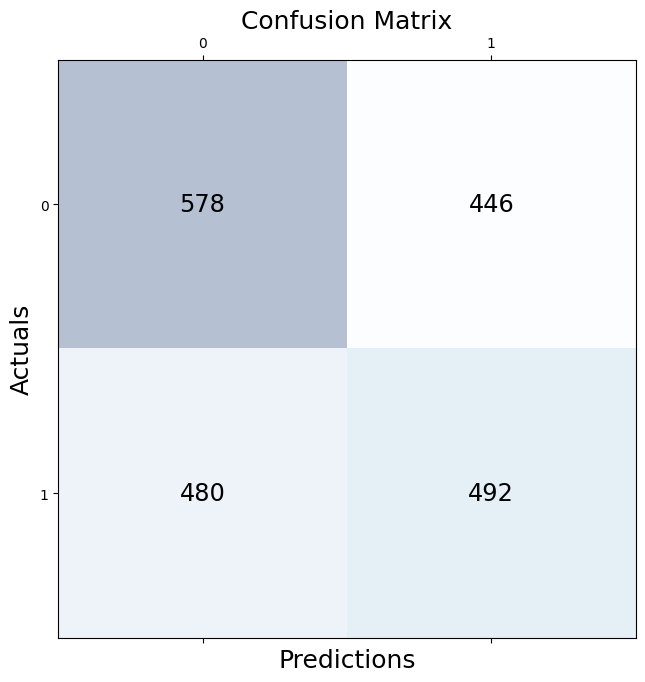

In [12]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

**Evaluating the model**

In [13]:
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=0))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label=0))

Accuracy: 0.5360721442885772
Recall: 0.564453125
F1 score: 0.5552353506243997


#Approach 2 - Oversample minority group by applying Python package imlearn.

In [35]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

model3 = LogisticRegression()

# fit the model with data
model3.fit(X_resampled,y_resampled)

y_pred = model3.predict(X_test)

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [37]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

Text(0.5, 1.0, 'Confusion Matrix')

**Evaluating the model**

In [38]:
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=0))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label=0))

Accuracy: 0.42066824904144606
Recall: 0.6957383548067394
F1 score: 0.30675114703954554


#Approach 3 - Undersample majority group by applying Python package imlearn.

In [23]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

model4 = LogisticRegression()

# fit the model with data
model4.fit(X_resampled,y_resampled)

y_pred = model4.predict(X_test)

In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [25]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

Text(0.5, 1.0, 'Confusion Matrix')

**Evaluating the model**

In [26]:
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=0))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label=0))

Accuracy: 0.35877305094029577
Recall: 0.7631318136769079
F1 score: 0.30482977038796516


#Perform Cross Validation in Classification

In [27]:
scores = cross_val_score(model1, X, y, cv=10, scoring='f1_macro')
scores

array([0.44991213, 0.44991213, 0.44991213, 0.44991213, 0.44991213,
       0.44991213, 0.44977398, 0.44988696, 0.44988696, 0.44988696])

In [28]:
print("Macro F1 for Model 1 is", scores.mean(), "with a standard deviation of", scores.std())

Macro F1 for Model 1 is 0.44989076313736803 with a standard deviation of 4.052074669506343e-05


In [29]:
scores = cross_val_score(model2, X, y, cv=10, scoring='f1_macro')
scores

array([0.52621898, 0.48814803, 0.44961546, 0.43312652, 0.41977605,
       0.40052801, 0.36632005, 0.40459902, 0.36681161, 0.38927059])

In [30]:
print("Macro F1 for Model 2 is", scores.mean(), "with a standard deviation of", scores.std())

Macro F1 for Model 2 is 0.4244414327584212 with a standard deviation of 0.049040780978678276


In [31]:
scores = cross_val_score(model3, X, y, cv=10, scoring='f1_macro')
scores

array([0.44991213, 0.44991213, 0.44991213, 0.44991213, 0.44991213,
       0.44991213, 0.44977398, 0.44988696, 0.44988696, 0.44988696])

In [32]:
print("Macro F1 for Model 3 is", scores.mean(), "with a standard deviation of", scores.std())

Macro F1 for Model 3 is 0.44989076313736803 with a standard deviation of 4.052074669506343e-05


In [33]:
scores = cross_val_score(model4, X, y, cv=10, scoring='f1_macro')
scores

array([0.44991213, 0.44991213, 0.44991213, 0.44991213, 0.44991213,
       0.44991213, 0.44977398, 0.44988696, 0.44988696, 0.44988696])

In [34]:
print("Macro F1 for Model 4 is", scores.mean(), "with a standard deviation of", scores.std())

Macro F1 for Model 4 is 0.44989076313736803 with a standard deviation of 4.052074669506343e-05
